In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = 'https://raw.githubusercontent.com/mattharrison/datasets/master/data/dirtydevil.txt'
df = pd.read_csv(url,skiprows=lambda x: x<34 or x ==35 ,sep ='\t')
df.head()

,agency_cd,site_no,datetime,tz_cd,144166_00060,144166_00060_cd,144167_00065,144167_00065_cd
0,USGS,9333500,2001-05-07 01:00,MDT,71.0,A:[91],NaN,NaN
1,USGS,9333500,2001-05-07 01:15,MDT,71.0,A:[91],NaN,NaN
2,USGS,9333500,2001-05-07 01:30,MDT,71.0,A:[91],NaN,NaN
3,USGS,9333500,2001-05-07 01:45,MDT,70.0,A:[91],NaN,NaN
4,USGS,9333500,2001-05-07 02:00,MDT,70.0,A:[91],NaN,NaN


In [4]:
def tweak_river(df_):
    return(df_
        .assign(datetime=pd.to_datetime(df_.datetime))
        .rename(columns={'144166_00060':'cfs','144167_00065':'gage_height'})
        .set_index('datetime'))

In [5]:
dd = tweak_river(df)
dd.head()

,agency_cd,site_no,tz_cd,cfs,144166_00060_cd,gage_height,144167_00065_cd
datetime,,,,,,,
2001-05-07 01:00:00,USGS,9333500,MDT,71.0,A:[91],NaN,NaN
2001-05-07 01:15:00,USGS,9333500,MDT,71.0,A:[91],NaN,NaN
2001-05-07 01:30:00,USGS,9333500,MDT,71.0,A:[91],NaN,NaN
2001-05-07 01:45:00,USGS,9333500,MDT,70.0,A:[91],NaN,NaN
2001-05-07 02:00:00,USGS,9333500,MDT,70.0,A:[91],NaN,NaN


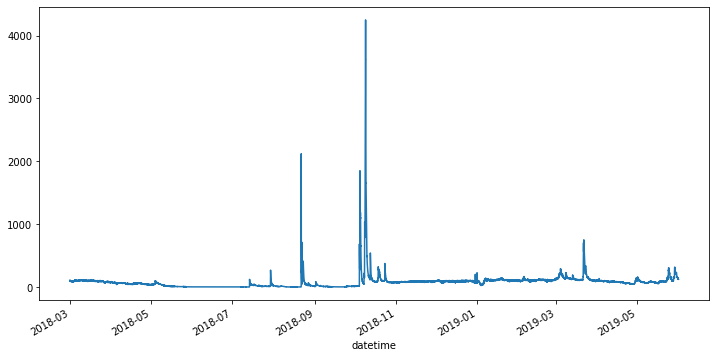

In [11]:
#Visualize the data
(dd
.cfs
.loc['2018/3':'2019/5']
.plot(figsize=(12,6))
)
plt.show()

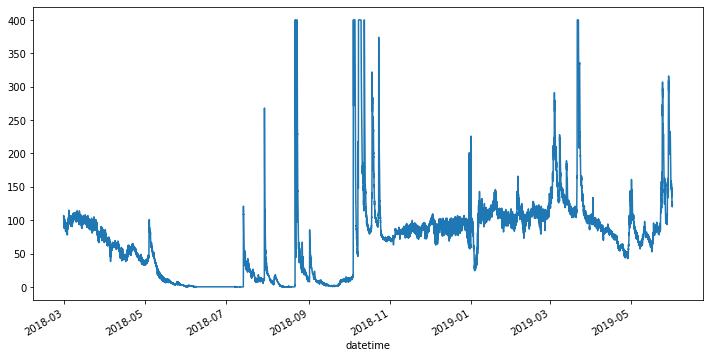

In [12]:
#Visualize the data
(dd
.cfs
.loc['2018/3':'2019/5']
.clip(upper=400)
.plot(figsize=(12,6))
)
plt.show()

In [13]:
dd2018 =(
dd.cfs
.loc['2018/3':'2019/5']
.clip(upper=400)
)

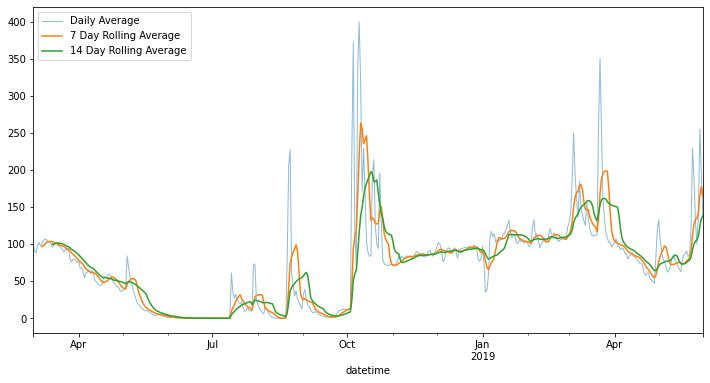

In [29]:
ax = (dd2018
.resample('D')
.mean()
.plot(figsize=(12,6),alpha=0.5,linewidth=1,label='Daily Average')
)
ax = (dd2018
.resample('D')
.mean()
.rolling(window=7)
.mean()
.plot(figsize=(12,6),ax =ax,label='7 Day Rolling Average')
)
ax = (dd2018
.resample('D')
.mean()
.rolling(window=14)
.mean()
.plot(figsize=(12,6),ax =ax,label='14 Day Rolling Average')
)
ax.legend()
plt.show()

In [10]:
(dd
[['cfs']]
.loc['2018/3':'2019/5']
.query('cfs.isna()')
)

,cfs
datetime,
2018-07-07 13:15:00,NaN
2018-07-07 13:30:00,NaN
2018-07-07 13:45:00,NaN
2018-07-07 14:00:00,NaN
2018-07-07 14:15:00,NaN
...,...
2018-08-18 08:15:00,NaN
2018-08-18 08:30:00,NaN
2018-08-18 08:45:00,NaN
